In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Physical Attributes and Baseball Hitting Statistics 

Data Link:https://www.kaggle.com/datasets/open-source-sports/baseball-databank. 
Data Dictonary for these files can be found [here.](https://github.com/jaycolosi/Baseball-Data-Analysis)

The Baseball Databank is a compilation of historical baseball data on baseball players, teams, and games from 1871 to 2015. For this project I will only be using the Master.csv: which includes all physical attributes of players such as height and swing direction, and the Hitting.csv: which includes all hitting statistics by year. For this analysis, I will be exploring if the physical attributes of a baseball player have any effect on that player's hitting statistics. 

My hypothesis will be that height will have the greatest affect on a player's ability to hit Home Runs (HR).


In [2]:
#Import Files
players = pd.read_csv("Master.csv") #contains all player names, physical attributes 
hitstats = pd.read_csv("Batting.csv") #contains all stats per player per season

#Merge the files using playerID
dfRaw = pd.merge(players,hitstats, how='inner', on='playerID')
dfRaw.head()#check data

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,berkena01,1831.0,NaN,NaN,USA,PA,NaN,1900.0,2.0,23.0,...,0.0,0.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
1,carlle01,1832.0,2.0,25.0,USA,PA,Hanover,1885.0,5.0,19.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,wrighha01,1835.0,1.0,10.0,United Kingdom,NaN,Sheffield,1895.0,10.0,3.0,...,26.0,7.0,1.0,13.0,2.0,NaN,NaN,NaN,NaN,NaN
3,wrighha01,1835.0,1.0,10.0,United Kingdom,NaN,Sheffield,1895.0,10.0,3.0,...,23.0,0.0,0.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN
4,wrighha01,1835.0,1.0,10.0,United Kingdom,NaN,Sheffield,1895.0,10.0,3.0,...,35.0,1.0,1.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN


In [3]:
dfRaw.info() #investigate dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101332 entries, 0 to 101331
Data columns (total 45 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   playerID      101332 non-null  object 
 1   birthYear     101148 non-null  float64
 2   birthMonth    100764 non-null  float64
 3   birthDay      100419 non-null  float64
 4   birthCountry  101243 non-null  object 
 5   birthState    97871 non-null   object 
 6   birthCity     100828 non-null  object 
 7   deathYear     43672 non-null   float64
 8   deathMonth    43671 non-null   float64
 9   deathDay      43669 non-null   float64
 10  deathCountry  43647 non-null   object 
 11  deathState    43430 non-null   object 
 12  deathCity     43630 non-null   object 
 13  nameFirst     101292 non-null  object 
 14  nameLast      101332 non-null  object 
 15  nameGiven     101292 non-null  object 
 16  weight        100104 non-null  float64
 17  height        100170 non-null  float64
 18  bats

In [4]:
#Add new 'playerName' column to combine First and Last name into one column
dfRaw['playerName']= dfRaw['nameFirst'] + ' ' + dfRaw['nameLast'] #create new column
dfRaw.head()#check 

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,playerName
0,berkena01,1831.0,NaN,NaN,USA,PA,NaN,1900.0,2.0,23.0,...,0.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,Nate Berkenstock
1,carlle01,1832.0,2.0,25.0,USA,PA,Hanover,1885.0,5.0,19.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Lew Carl
2,wrighha01,1835.0,1.0,10.0,United Kingdom,NaN,Sheffield,1895.0,10.0,3.0,...,7.0,1.0,13.0,2.0,NaN,NaN,NaN,NaN,NaN,Harry Wright
3,wrighha01,1835.0,1.0,10.0,United Kingdom,NaN,Sheffield,1895.0,10.0,3.0,...,0.0,0.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,Harry Wright
4,wrighha01,1835.0,1.0,10.0,United Kingdom,NaN,Sheffield,1895.0,10.0,3.0,...,1.0,1.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,Harry Wright


In [5]:
dfRaw.columns #check

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'playerName'],
      dtype='object')

# CREATING DF DATAFRAME

In this data cleaning seciton, I drop unnesscary columns from the data set and dropped any players who had NAs in the physical attributes I wanted to explore: height, weight, batting direction (bats). The creation of this dataframe will allow me to explore the information before deciding what will remain in my final Player Dataframe.

In [6]:
#Create columns delete list 
colsdel= ['birthYear', 'birthMonth', 'birthDay', 'birthCountry','birthState', 'birthCity', 
          'deathYear', 'deathMonth', 'deathDay','deathCountry', 'deathState', 'deathCity', 
          'nameFirst', 'nameLast','nameGiven','debut', 'finalGame','retroID', 'bbrefID','stint', 
          'teamID','lgID','2B', '3B','SB', 'CS','IBB', 'HBP','SH', 'SF', 'GIDP']

In [7]:
#Create df with clean nulls and dropped columns
df= dfRaw.drop(colsdel, axis=1) 
df #check 

,playerID,weight,height,bats,throws,yearID,G,AB,R,H,HR,RBI,BB,SO,playerName
0,berkena01,NaN,NaN,NaN,NaN,1871,1,4.0,0.0,0.0,0.0,0.0,0.0,3.0,Nate Berkenstock
1,carlle01,NaN,NaN,NaN,NaN,1874,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Lew Carl
2,wrighha01,157.0,69.0,R,R,1871,31,147.0,42.0,44.0,0.0,26.0,13.0,2.0,Harry Wright
3,wrighha01,157.0,69.0,R,R,1872,48,208.0,39.0,52.0,0.0,23.0,9.0,2.0,Harry Wright
4,wrighha01,157.0,69.0,R,R,1873,58,266.0,57.0,67.0,2.0,35.0,10.0,3.0,Harry Wright
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,wills01,NaN,NaN,NaN,NaN,1884,5,21.0,2.0,3.0,0.0,NaN,0.0,NaN,NaN
101328,wood01,NaN,NaN,NaN,NaN,1874,1,5.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
101329,wrighbi01,NaN,NaN,NaN,NaN,1887,1,3.0,0.0,2.0,0.0,0.0,0.0,0.0,Bill Wright
101330,yostgu01,NaN,77.0,NaN,NaN,1893,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Gus Yost


In [8]:
#Drop players who have null values in the physical attributes I want to look at 
df.dropna(axis=0, subset=['height','weight','bats'], inplace=True)

In [9]:
df.isna().sum() #check nulls

playerID          0
weight            0
height            0
bats              0
throws          231
yearID            0
G                 0
AB             5149
R              5149
H              5149
HR             5149
RBI            5347
BB             5149
SO            11770
playerName        0
dtype: int64

# Player DataFrame

In the original dataset a player can appear in multiple lines as the stats are captures per year per team. This also means a player can appear more then once per year if he has been traded to a different team and will have split stats for that season. In order to get a more accurate picture of the players overall performance I want to create a dataframe which will sum the players total stats. For this I needed to create one dataframe of the total player stats and then merge it back together with the players themselves in order to perserve their physical attributes. This Players Dataframe is what I will be using for the majority of my anlaysis.

In [10]:
#Players Total Stats (Sum)
stats_df = df.groupby('playerID', as_index=True).sum().drop(columns=['weight','height'],axis=1).reset_index()
stats_df.head()

,playerID,yearID,G,AB,R,H,HR,RBI,BB,SO
0,aardsda01,18084,331,4.0,0.0,0.0,0.0,0.0,0.0,2.0
1,aaronha01,45195,3298,12364.0,2174.0,3771.0,755.0,2297.0,1402.0,1383.0
2,aaronto01,13768,437,944.0,102.0,216.0,13.0,94.0,86.0,145.0
3,aasedo01,25786,448,5.0,0.0,0.0,0.0,0.0,0.0,3.0
4,abadan01,6010,15,21.0,1.0,2.0,0.0,0.0,4.0,5.0


In [11]:
#Players names and physical attributes
df_1 = df[['playerID','weight','height','bats','playerName']]
df_1.head()

,playerID,weight,height,bats,playerName
2,wrighha01,157.0,69.0,R,Harry Wright
3,wrighha01,157.0,69.0,R,Harry Wright
4,wrighha01,157.0,69.0,R,Harry Wright
5,wrighha01,157.0,69.0,R,Harry Wright
6,wrighha01,157.0,69.0,R,Harry Wright


In [12]:
#As you can see from the df_1 head, players are duplicated in the table, so I will drop duplicated players here. 

player_df = pd.merge(stats_df, df_1, left_on='playerID', right_on='playerID', how='left').drop_duplicates()

In [13]:
player_df.head() #check the final dataframe

,playerID,yearID,G,AB,R,H,HR,RBI,BB,SO,weight,height,bats,playerName
0,aardsda01,18084,331,4.0,0.0,0.0,0.0,0.0,0.0,2.0,220.0,75.0,R,David Aardsma
9,aaronha01,45195,3298,12364.0,2174.0,3771.0,755.0,2297.0,1402.0,1383.0,180.0,72.0,R,Hank Aaron
32,aaronto01,13768,437,944.0,102.0,216.0,13.0,94.0,86.0,145.0,190.0,75.0,R,Tommie Aaron
39,aasedo01,25786,448,5.0,0.0,0.0,0.0,0.0,0.0,3.0,190.0,75.0,R,Don Aase
52,abadan01,6010,15,21.0,1.0,2.0,0.0,0.0,4.0,5.0,184.0,73.0,L,Andy Abad


The Batting Average (BAV) is another important hitting statistic that measures the success of a hitter and their ability to get any type of hit in baseball. It is calculated by taking the total amount of hits(H) a player has gotten and dividing it by their total At-Bats (AB). It is traditionally always rounded to the third decimal place. According to [MLB.com](https://www.mlb.com/glossary/standard-stats/batting-average) the league-wide batting average has typically hovered around .250.

In [14]:
#Create Batting Average Col
#Hits / At Bats (H/AB)
player_df['BAV']= round((player_df.loc[:,'H']/player_df.loc[:,'AB']),3)

#Reorder and rename the columns for readability
player_df= player_df[['playerID','playerName','height','bats','weight','HR','RBI','BAV','SO','G','AB','R','H','BB']]
player_df.rename(columns = {'R':'Runs'}, inplace = True)
player_df.head()

,playerID,playerName,height,bats,weight,HR,RBI,BAV,SO,G,AB,Runs,H,BB
0,aardsda01,David Aardsma,75.0,R,220.0,0.0,0.0,0.000,2.0,331,4.0,0.0,0.0,0.0
9,aaronha01,Hank Aaron,72.0,R,180.0,755.0,2297.0,0.305,1383.0,3298,12364.0,2174.0,3771.0,1402.0
32,aaronto01,Tommie Aaron,75.0,R,190.0,13.0,94.0,0.229,145.0,437,944.0,102.0,216.0,86.0
39,aasedo01,Don Aase,75.0,R,190.0,0.0,0.0,0.000,3.0,448,5.0,0.0,0.0,0.0
52,abadan01,Andy Abad,73.0,L,184.0,0.0,0.0,0.095,5.0,15,21.0,1.0,2.0,4.0


In [15]:
player_df.isna().sum()

playerID         0
playerName       0
height           0
bats             0
weight           0
HR               0
RBI              0
BAV           1912
SO               0
G                0
AB               0
Runs             0
H                0
BB               0
dtype: int64

In [16]:
#CLEAN BAV NULLS
player_df.dropna(axis=0, subset=['BAV'], inplace=True)

In [17]:
player_df.isna().sum()

playerID      0
playerName    0
height        0
bats          0
weight        0
HR            0
RBI           0
BAV           0
SO            0
G             0
AB            0
Runs          0
H             0
BB            0
dtype: int64

For my analysis I also wanted to focus on players who has played at least a full MLB season worth of games (162) as well as had a average amount of At-Bats which according to MLB players on average have about 130 plate appearances in a season. Having players who have very few games and/or at-bats would cause a skew in my data. 

In [18]:
player_df= player_df.loc[(player_df['G'] >=162) & (player_df['AB'] >=130)] #only look at players who have these parameters 

In [19]:
player_df.describe() #investigate data 

,height,weight,HR,RBI,BAV,SO,G,AB,Runs,H,BB
count,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000
mean,71.927383,184.830224,46.587662,276.953269,0.238595,297.842158,731.932594,2275.578753,305.656749,603.216171,213.267104
std,2.432361,20.081879,80.036308,323.385437,0.048930,319.416237,564.485825,2171.100770,342.790995,631.646956,257.841206
min,63.000000,120.000000,0.000000,1.000000,0.029000,0.000000,162.000000,130.000000,1.000000,6.000000,0.000000
25%,70.000000,170.000000,3.000000,57.000000,0.222000,92.000000,298.000000,642.000000,65.000000,142.000000,41.000000
50%,72.000000,183.000000,15.000000,147.000000,0.250000,180.000000,525.000000,1407.000000,168.000000,354.000000,113.000000
75%,74.000000,195.000000,52.000000,387.000000,0.270000,386.000000,1025.000000,3347.000000,434.000000,880.000000,291.000000
max,82.000000,295.000000,762.000000,2297.000000,0.366000,2597.000000,3562.000000,14053.000000,2295.000000,4256.000000,2558.000000


# EXPLORE THE DATA

Due to the vast range of games that players have played depending on the length of their career creates challenges within my analysis. Therefore, I decided to only look at the averages of these stats below which are created in the columns. 

In [20]:
player_df['avgHR']= player_df.loc[:,'HR']/player_df.loc[:,'AB'] #HomeRuns divided by At Bats 
player_df['avgRBI']= player_df.loc[:,'RBI']/player_df.loc[:,'AB'] #avg rbis
player_df['avgSO']= player_df.loc[:,'SO']/player_df.loc[:,'AB'] #strikeouts 

In [21]:
player_df.head()

,playerID,playerName,height,bats,weight,HR,RBI,BAV,SO,G,AB,Runs,H,BB,avgHR,avgRBI,avgSO
9,aaronha01,Hank Aaron,72.0,R,180.0,755.0,2297.0,0.305,1383.0,3298,12364.0,2174.0,3771.0,1402.0,0.061064,0.185781,0.111857
32,aaronto01,Tommie Aaron,75.0,R,190.0,13.0,94.0,0.229,145.0,437,944.0,102.0,216.0,86.0,0.013771,0.099576,0.153602
63,abbated01,Ed Abbaticchio,71.0,R,170.0,11.0,324.0,0.254,16.0,855,3044.0,355.0,772.0,289.0,0.003614,0.106439,0.005256
79,abbeych01,Charlie Abbey,68.0,L,169.0,19.0,280.0,0.281,105.0,451,1751.0,307.0,492.0,167.0,0.010851,0.159909,0.059966
100,abbotje01,Jeff Abbott,74.0,R,190.0,18.0,83.0,0.263,91.0,233,596.0,82.0,157.0,38.0,0.030201,0.139262,0.152685


In [22]:
player_df.shape

(5949, 17)

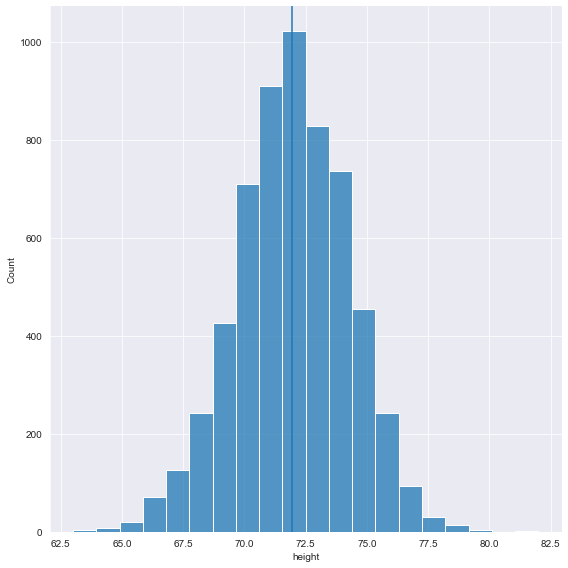

In [23]:
sns.set_style('darkgrid')
sns.displot(data=player_df, x='height', height=8, aspect=1, kind='hist', bins=20)
plt.axvline(player_df['height'].mean()) 

In [24]:
player_df['height'].mean() #check

71.92738275340393

The data here is evenly distrubuted and the average height of a player in the set is: 71.93.

<AxesSubplot:xlabel='bats'>

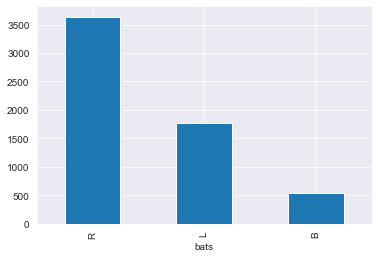

In [25]:
#Players Swing Direction
plt.xticks(rotation=180)
player_df.value_counts(player_df['bats']).plot(kind='bar')

<AxesSubplot:xlabel='height'>

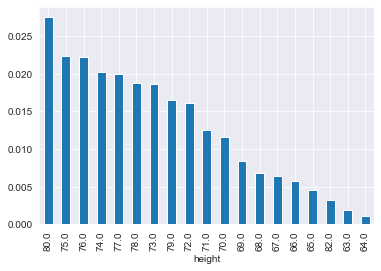

In [26]:
#WHATS THE AVG # OF HRS PER HEIGHT
homeruns= player_df.groupby('height')['avgHR'].mean() #AVG HR RUNS instead TOTAL 
homeruns.sort_values(ascending=False).plot(kind='bar')

In [27]:
avgHRsort= player_df.sort_values(['avgHR'],ascending=False)

#Create Ranking by resetting the index when players are sorted by avg HRs 
avgHRsort = avgHRsort.reset_index() 
avgHRsort.index = avgHRsort.index + 1
avgHRsort

,index,playerID,playerName,height,bats,weight,HR,RBI,BAV,SO,G,AB,Runs,H,BB,avgHR,avgRBI,avgSO
1,58157,mcgwima01,Mark McGwire,77.0,R,215.0,583.0,1414.0,0.263,1596.0,1874,6187.0,1167.0,1626.0,1317.0,0.094230,0.228544,0.257960
2,77747,ruthba01,Babe Ruth,74.0,L,215.0,714.0,2217.0,0.342,1330.0,2503,8398.0,2174.0,2873.0,2062.0,0.085020,0.263991,0.158371
3,8056,bondsba01,Barry Bonds,73.0,L,185.0,762.0,1996.0,0.298,1539.0,2986,9847.0,2227.0,2935.0,2558.0,0.077384,0.202701,0.156291
4,88653,thomeji01,Jim Thome,76.0,L,250.0,612.0,1699.0,0.276,2548.0,2543,8422.0,1583.0,2328.0,1747.0,0.072667,0.201734,0.302541
5,47154,kinerra01,Ralph Kiner,74.0,R,195.0,369.0,1015.0,0.279,749.0,1472,5205.0,971.0,1451.0,1011.0,0.070893,0.195005,0.143900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,44073,johnsea01,Earl Johnson,75.0,L,190.0,0.0,13.0,0.187,53.0,181,171.0,15.0,32.0,9.0,0.000000,0.076023,0.309942
5946,44060,johnsdo03,Don Johnson,75.0,R,200.0,0.0,7.0,0.058,47.0,198,155.0,1.0,9.0,5.0,0.000000,0.045161,0.303226
5947,81899,sieveed01,Ed Siever,71.0,L,190.0,0.0,24.0,0.156,0.0,204,526.0,37.0,82.0,16.0,0.000000,0.045627,0.000000
5948,5313,beggsjo01,Joe Beggs,73.0,R,182.0,0.0,11.0,0.167,48.0,238,198.0,14.0,33.0,8.0,0.000000,0.055556,0.242424


In [28]:
avgHRsort.head(15) #top 15 players by avg Home Runs

,index,playerID,playerName,height,bats,weight,HR,RBI,BAV,SO,G,AB,Runs,H,BB,avgHR,avgRBI,avgSO
1,58157,mcgwima01,Mark McGwire,77.0,R,215.0,583.0,1414.0,0.263,1596.0,1874,6187.0,1167.0,1626.0,1317.0,0.094230,0.228544,0.257960
2,77747,ruthba01,Babe Ruth,74.0,L,215.0,714.0,2217.0,0.342,1330.0,2503,8398.0,2174.0,2873.0,2062.0,0.085020,0.263991,0.158371
3,8056,bondsba01,Barry Bonds,73.0,L,185.0,762.0,1996.0,0.298,1539.0,2986,9847.0,2227.0,2935.0,2558.0,0.077384,0.202701,0.156291
4,88653,thomeji01,Jim Thome,76.0,L,250.0,612.0,1699.0,0.276,2548.0,2543,8422.0,1583.0,2328.0,1747.0,0.072667,0.201734,0.302541
5,47154,kinerra01,Ralph Kiner,74.0,R,195.0,369.0,1015.0,0.279,749.0,1472,5205.0,971.0,1451.0,1011.0,0.070893,0.195005,0.143900
6,84941,stantmi03,Giancarlo Stanton,78.0,R,240.0,181.0,466.0,0.270,837.0,708,2567.0,397.0,693.0,352.0,0.070510,0.181535,0.326062
7,47017,killeha01,Harmon Killebrew,72.0,R,195.0,573.0,1584.0,0.256,1699.0,2435,8147.0,1283.0,2086.0,1559.0,0.070333,0.194427,0.208543
8,83914,sosasa01,Sammy Sosa,72.0,R,165.0,609.0,1667.0,0.273,2306.0,2354,8813.0,1475.0,2408.0,929.0,0.069102,0.189152,0.261659
9,96047,willite01,Ted Williams,75.0,L,205.0,521.0,1839.0,0.344,709.0,2292,7706.0,1798.0,2654.0,2021.0,0.067610,0.238645,0.092006
10,72783,ramirma02,Manny Ramirez,72.0,R,225.0,555.0,1831.0,0.312,1813.0,2302,8244.0,1544.0,2574.0,1329.0,0.067322,0.222101,0.219918


In [29]:
avgHRsort.sort_values(['BAV'],ascending=False).head(15) #Top 15 players by batting average.

,index,playerID,playerName,height,bats,weight,HR,RBI,BAV,SO,G,AB,Runs,H,BB,avgHR,avgRBI,avgSO
3026,16651,cobbty01,Ty Cobb,73.0,L,175.0,117.0,1937.0,0.366,357.0,3035,11434.0,2246.0,4189.0,1249.0,0.010233,0.169407,0.031223
4834,4173,barnero01,Ross Barnes,68.0,R,145.0,6.0,350.0,0.359,65.0,499,2392.0,698.0,859.0,114.0,0.002508,0.146321,0.027174
637,40968,hornsro01,Rogers Hornsby,71.0,R,175.0,301.0,1584.0,0.358,679.0,2259,8173.0,1579.0,2930.0,1038.0,0.036829,0.193809,0.083078
2930,42912,jacksjo01,Shoeless Joe Jackson,73.0,L,200.0,54.0,785.0,0.356,158.0,1332,4981.0,873.0,1772.0,519.0,0.010841,0.157599,0.031721
3650,59722,meyerle01,Levi Meyerle,73.0,R,177.0,10.0,279.0,0.356,14.0,307,1443.0,306.0,513.0,10.0,0.006930,0.193347,0.009702
748,65885,odoulle01,Lefty O'Doul,72.0,L,180.0,113.0,542.0,0.349,122.0,970,3264.0,624.0,1140.0,333.0,0.034620,0.166054,0.037377
4255,58838,mcveyca01,Cal McVey,69.0,R,170.0,11.0,448.0,0.346,51.0,530,2513.0,555.0,869.0,30.0,0.004377,0.178273,0.020294
2565,21493,delahed01,Ed Delahanty,73.0,R,170.0,101.0,1464.0,0.346,244.0,1835,7505.0,1599.0,2596.0,741.0,0.013458,0.195070,0.032512
2833,84118,speaktr01,Tris Speaker,71.0,L,193.0,117.0,1529.0,0.345,220.0,2789,10195.0,1882.0,3514.0,1381.0,0.011476,0.149975,0.021579
3773,35867,hamilbi01,Billy Hamilton,66.0,L,165.0,40.0,736.0,0.344,218.0,1591,6268.0,1690.0,2158.0,1187.0,0.006382,0.117422,0.034780


The Top 15 players with the highest average of home runs are above average height. Mark McGwire who leads the players in average Home Runs is 6 inches taller then the player average (71.92). However, the Top 15 players shift in ranking when looking at the players with the highest Batting Average with only 2 players, Ted Williams and Babe Ruth, appearing in both tables. The players who have the highest Batting Average (BAV) are shorter in height then those who have the highest average of home runs, with Billy Hamilton being the shortest player in both tables.

One would think that if you have a great home run average you also have a great batting average as a player with a high BAV would score alot of hits in the game. This data tells me that players who hit the most home runs does not also equal great all around hitter.

# QUESTION: Does a baseball player's physical attributes affect their hitting statistics? 

In the following section I will be answering if height and swing direction give a player any advantage when hitting home runs. I will be looking at the correlation of this data points as well as running a linear regression model. 

In [30]:
bats_encoded = pd.get_dummies(player_df['bats']) #will create new columns for each

In [31]:
player_df = pd.concat([player_df, bats_encoded],axis=1) #adding this col to ivar write over it
player_df.drop(columns=['bats'], inplace=True) #drop the columns in place
player_df.rename({'B':'Switch', 'L':'Left','R':'Right'}, axis=1, inplace=True)
player_df.head()

,playerID,playerName,height,weight,HR,RBI,BAV,SO,G,AB,Runs,H,BB,avgHR,avgRBI,avgSO,Switch,Left,Right
9,aaronha01,Hank Aaron,72.0,180.0,755.0,2297.0,0.305,1383.0,3298,12364.0,2174.0,3771.0,1402.0,0.061064,0.185781,0.111857,0,0,1
32,aaronto01,Tommie Aaron,75.0,190.0,13.0,94.0,0.229,145.0,437,944.0,102.0,216.0,86.0,0.013771,0.099576,0.153602,0,0,1
63,abbated01,Ed Abbaticchio,71.0,170.0,11.0,324.0,0.254,16.0,855,3044.0,355.0,772.0,289.0,0.003614,0.106439,0.005256,0,0,1
79,abbeych01,Charlie Abbey,68.0,169.0,19.0,280.0,0.281,105.0,451,1751.0,307.0,492.0,167.0,0.010851,0.159909,0.059966,0,1,0
100,abbotje01,Jeff Abbott,74.0,190.0,18.0,83.0,0.263,91.0,233,596.0,82.0,157.0,38.0,0.030201,0.139262,0.152685,0,0,1


<AxesSubplot:>

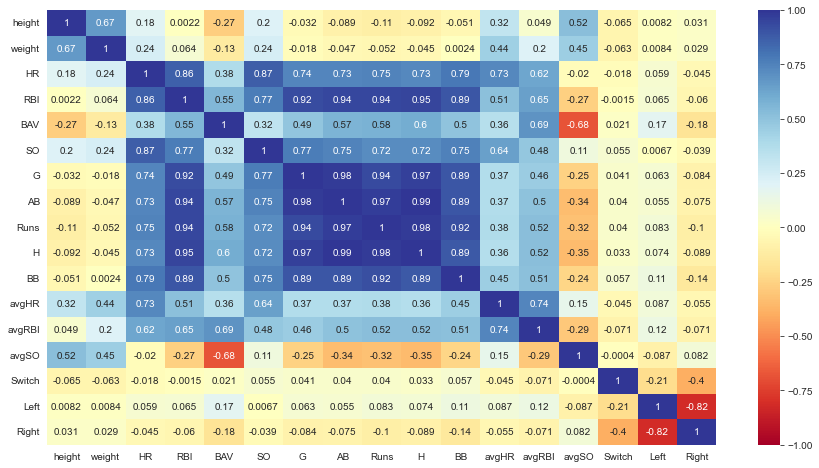

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(player_df.corr(),cmap='RdYlBu',vmin=-1.0,vmax=1.0,annot=True)

## CORRELATION ANALYSIS 

From looking at the heatmap of the correlation between physical attributes and hitting statistics, we can see that there is no strong correlations between height and home runs. However, height is weakly correlated to avg strikeouts. This could be due to the fact [strike zones](https://www.mlb.com/glossary/rules/strike-zone) are defined by a players physical statue with that taller players often times having a larger strikezone.
Surprisingly, the swing direction of a players does not correlate with any of the hitting statistics that could be earned by player. 


This map helps visualize that there is multicollinearity between many hitting statistics such as Games (G), At Bats (AB), and Batting Average (BAV) to Strikeouts. These are relationships that I would expect to see in this graph. However, they will cause issues when running my linear regression model below as I continue to investigate the average Home Runs.


In [33]:
player_df.columns 
#remove: playerID, playerName, HR, RBI,SO, G, AB, Runs, H, BB

Index(['playerID', 'playerName', 'height', 'weight', 'HR', 'RBI', 'BAV', 'SO',
       'G', 'AB', 'Runs', 'H', 'BB', 'avgHR', 'avgRBI', 'avgSO', 'Switch',
       'Left', 'Right'],
      dtype='object')

In [34]:
regressData = player_df[['height','weight','BAV','avgRBI','avgSO','Switch','Left','Right','avgHR']].copy()

In [35]:
regressData.dropna(axis=0, inplace=True)

In [36]:
d_var = regressData['avgHR'] #dependant (HRS)
i_var = regressData[['height','weight','BAV','avgRBI','avgSO','Switch','Left','Right']] #variables that effect the dependant
i_var['constant'] = np.ones(i_var.shape[0])

In [37]:
import statsmodels.api as sm 

lin_reg = sm.OLS(d_var,i_var) #OLS 
reg_result = lin_reg.fit() #store the result instead a variable 
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  avgHR   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2114.
Date:                Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:55:09   Log-Likelihood:                 20428.
No. Observations:                5949   AIC:                        -4.084e+04
Df Residuals:                    5941   BIC:                        -4.079e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.0003   5.93e-05      4.420      0.0

In [38]:
d_var = regressData['avgHR'] #dependant (HRS)
i_var2 = regressData[['height','Switch','Left','Right']].copy() #only look at physical attributes 
i_var2['constant'] = np.ones(i_var.shape[0])

In [39]:
lin_reg2 = sm.OLS(d_var,i_var2) #OLS 
reg_result2 = lin_reg2.fit() #store the result instead a variable 
print(reg_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  avgHR   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     238.1
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          6.64e-146
Time:                        22:55:09   Log-Likelihood:                 17047.
No. Observations:                5949   AIC:                        -3.409e+04
Df Residuals:                    5945   BIC:                        -3.406e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.0019   7.36e-05     25.673      0.0

# FINAL THOUGHTS 

In conclusion, the results indicate that a baseball players' physical attributes do not significantly impact the player's ability to hit home runs. This disapproves my original hypothesis as I believed that height and swing direction would give a player certain advantage when it came to their hitting statistics. 

When looking at the top 15 players in HR avg and BAV you can see that there is a trend of taller player getting more home runs. However, this small sample size does not reflect the full data as seen in the correllation table/heat map.